In [8]:
import pandas as pd

df = pd.read_csv('/Users/shraddhagupta/Downloads/dsp/utility/hard_fix_september_11_2024.csv')

# Filter the dataset for years 2018 to 2022
filtered_df = df[(df['Year'] >= 2018) & (df['Year'] <= 2022)]

# Group by State and check if each state has data for all years from 2018 to 2022
years_range = set(range(2018, 2023))
states_with_complete_data = (
    filtered_df.groupby('State')['Year']
    .apply(set)  
    .apply(lambda years: years_range.issubset(years))  
    .loc[lambda x: x]  
    .index.tolist()  
)

print("States with data from 2018 to 2022:")
print(states_with_complete_data)


States with data from 2018 to 2022:
['Alabama', 'California', 'Colorado', 'Connecticut', 'Florida', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Missouri', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Rhode Island', 'South Carolina', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Washington, D.C.', 'Wisconsin']


In [2]:

states_with_complete_data = [
    'Alabama', 'California', 'Colorado', 'Connecticut', 'Florida', 'Hawaii', 'Idaho', 'Illinois', 
    'Indiana', 'Iowa', 'Louisiana', 'Maine', 'Maryland', 'Michigan', 'Minnesota', 'Missouri', 
    'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
    'Oklahoma', 'Oregon', 'Rhode Island', 'South Carolina', 'Texas', 'Utah', 'Vermont', 
    'Virginia', 'Washington', 'Washington, D.C.', 'Wisconsin'
]

# Filter the dataset for the specified states and years
filtered_df2 = df[
    (df['State'].isin(states_with_complete_data)) &  
    (df['Year'] >= 2018) & (df['Year'] <= 2022)  

print(filtered_df2.head())


       State    Utility Name       Utility Type Service Type  Year     Month  \
96   Alabama  City of Dothan  Municipal Utility     Electric  2018   January   
97   Alabama  City of Dothan  Municipal Utility     Electric  2018  February   
98   Alabama  City of Dothan  Municipal Utility     Electric  2018     March   
99   Alabama  City of Dothan  Municipal Utility     Electric  2018     April   
100  Alabama  City of Dothan  Municipal Utility     Electric  2018       May   

     Total Disconnections  Total Reconnenctions  Total Connections  \
96                 1565.0                 932.0            25721.0   
97                 2293.0                1430.0            25535.0   
98                 1999.0                1292.0            25736.0   
99                 2000.0                1239.0            25582.0   
100                1603.0                1013.0            25702.0   

     Disconnection Rate  
96             0.060845  
97             0.089798  
98             0.077

Calculate the mean disconnection rate for each period across all states to observe national trends.

Hypothesis Testing:

ANOVA is used to compare means of disconnection rates between the three periods:

𝐻0 - The mean disconnection rates are the same across all periods.

𝐻1 - At least one period has a different mean disconnection rate.

# ANOVA

In [3]:
import pandas as pd
from scipy.stats import f_oneway 

# Load the filtered dataset
data = filtered_df2

# Categorize years into periods
def categorize_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year == 2020:
        return 'COVID'
    elif year in [2021, 2022]:
        return 'Post-COVID'

data['Period'] = data['Year'].apply(categorize_period)

# National trend: Aggregate disconnection rates by period
national_trends = data.groupby('Period')['Disconnection Rate'].mean().reset_index()
print("National Disconnection Rates by Period:")
print(national_trends)

# Prepare data for hypothesis testing
pre_covid_rates = data[data['Period'] == 'Pre-COVID']['Disconnection Rate']
covid_rates = data[data['Period'] == 'COVID']['Disconnection Rate']
post_covid_rates = data[data['Period'] == 'Post-COVID']['Disconnection Rate']

# Perform one-way ANOVA to compare means across the three periods
f_stat, p_value = f_oneway(pre_covid_rates, covid_rates, post_covid_rates)

# Print results
print("\nStatistical Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference in disconnection rates between the periods.")
else:
    print("There is no statistically significant difference in disconnection rates between the periods.")


National Disconnection Rates by Period:
       Period  Disconnection Rate
0       COVID            0.002580
1  Post-COVID            0.003664
2   Pre-COVID            0.005912

Statistical Test Results:
F-statistic: nan
P-value: nan
There is no statistically significant difference in disconnection rates between the periods.


/var/folders/s_/1x9bb8b51jb2zw3cs4wq0v3w0000gn/T/ipykernel_14703/3463984187.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Period'] = data['Year'].apply(categorize_period)


Why the Result is NaN:

The dataset contains missing values for disconnection rates in certain rows.
When the statistical test encounters missing values, it cannot compute the test statistic properly.
If one of the periods (Pre-COVID, COVID, Post-COVID) has no valid data points, the test cannot make a comparison.

In [4]:
# Drop missing values for disconnection rates
pre_covid_rates = data[data['Period'] == 'Pre-COVID']['Disconnection Rate'].dropna()
covid_rates = data[data['Period'] == 'COVID']['Disconnection Rate'].dropna()
post_covid_rates = data[data['Period'] == 'Post-COVID']['Disconnection Rate'].dropna()

# Perform one-way ANOVA
f_stat, p_value = f_oneway(pre_covid_rates, covid_rates, post_covid_rates)

# Print results
print("\nStatistical Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference in disconnection rates between the periods.")
else:
    print("There is no statistically significant difference in disconnection rates between the periods.")



Statistical Test Results:
F-statistic: 126.0037
P-value: 0.0000
There is a statistically significant difference in disconnection rates between the periods.


Given the dataset's characteristics, especially with missing data and potential non-normality in disconnection rates, considered non-parametric hypothesis testing methods as they do not rely on strict assumptions of normality or equal variances.

The p-value is much less than 0.05, so we reject H0(null hypothesis). There is a statistically significant difference in mean disconnection rates between the periods. At least one period has a different mean disconnection rate.

Alternative Method: Kruskal-Wallis H-Test

The Kruskal-Wallis H-test is a non-parametric alternative to ANOVA. It compares the medians of disconnection rates across multiple groups (Pre-COVID, COVID, Post-COVID) without assuming normality.

Why Kruskal-Wallis?

Handles missing data more robustly (after dropping missing values).
Compares medians rather than means, which can be more appropriate for skewed data.

# Kruskal-Wallis H-Test

In [5]:
from scipy.stats import kruskal

# Categorize years into periods
def categorize_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year == 2020:
        return 'COVID'
    elif year in [2021, 2022]:
        return 'Post-COVID'

data['Period'] = data['Year'].apply(categorize_period)

# Drop missing values for disconnection rates
data = data.dropna(subset=['Disconnection Rate'])

# Group disconnection rates by period
pre_covid_rates = data[data['Period'] == 'Pre-COVID']['Disconnection Rate']
covid_rates = data[data['Period'] == 'COVID']['Disconnection Rate']
post_covid_rates = data[data['Period'] == 'Post-COVID']['Disconnection Rate']

# Perform Kruskal-Wallis H-Test
h_stat, p_value = kruskal(pre_covid_rates, covid_rates, post_covid_rates)

# Print results
print("\nKruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in median disconnection rates between the periods.")
else:
    print("There is no statistically significant difference in median disconnection rates between the periods.")



Kruskal-Wallis Test Results:
H-statistic: 1264.8274
P-value: 0.0000
There is a statistically significant difference in median disconnection rates between the periods.


/var/folders/s_/1x9bb8b51jb2zw3cs4wq0v3w0000gn/T/ipykernel_14703/726208052.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Period'] = data['Year'].apply(categorize_period)


At least one of the periods has a significantly different median disconnection rate compared to the others.
This does not specify which periods differ; it only indicates that a difference exists.

We reject null hypothesis here. At least one period has a different median disconnection rate.

Next Steps:

Perform post-hoc pairwise comparisons to determine which periods (Pre-COVID vs COVID, COVID vs Post-COVID, etc.) differ from each other.

Dunn’s Test is commonly used for post-hoc pairwise comparisons after Kruskal-Wallis. It adjusts for multiple comparisons to control the family-wise error rate.

# Dunn’s Test

In [6]:
pre_covid_rates = pre_covid_rates.dropna()
covid_rates = covid_rates.dropna()
post_covid_rates = post_covid_rates.dropna()

print("Data counts per period:")
print("Pre-COVID:", len(pre_covid_rates))
print("COVID:", len(covid_rates))
print("Post-COVID:", len(post_covid_rates))

import pandas as pd
import scikit_posthocs as sp
import numpy as np

# Combine the data into one array for disconnection rates
all_rates = np.concatenate([pre_covid_rates, covid_rates, post_covid_rates])

# Create a corresponding array of group labels
groups = (
    ['Pre-COVID'] * len(pre_covid_rates) +
    ['COVID'] * len(covid_rates) +
    ['Post-COVID'] * len(post_covid_rates)
)

# Create a DataFrame with the two columns required by Dunn's test
df = pd.DataFrame({
    'Disconnection Rate': all_rates,
    'Period': groups
})

# Run Dunn's post-hoc test
dunn_results = sp.posthoc_dunn(df, val_col='Disconnection Rate', group_col='Period', p_adjust='bonferroni')

# Print results
print("\nDunn's Post-hoc Test Results (p-values):")
print(dunn_results)



Data counts per period:
Pre-COVID: 3520
COVID: 2271
Post-COVID: 4418

Dunn's Post-hoc Test Results (p-values):
                    COVID     Post-COVID      Pre-COVID
COVID        1.000000e+00   1.001653e-71  7.113813e-270
Post-COVID   1.001653e-71   1.000000e+00  2.560229e-100
Pre-COVID   7.113813e-270  2.560229e-100   1.000000e+00


All comparisons between the periods show statistical significance (p-value < 0.05), indicating that the disconnection rates during the COVID period, Post-COVID period, and Pre-COVID period are all significantly different from each other.

Given that all the p-values are extremely small (close to zero), this suggests that the disconnection rates vary considerably across these three periods.

We reject null hypothesis for all pairwise comparisons. Every period pair (Pre-COVID, COVID, Post-COVID) has significantly different median disconnection rates.

Dunn’s Post-hoc Test revealed significant pairwise differences between all periods:
Pre-COVID rates were higher than COVID and Post-COVID.
COVID rates were lower than both Pre-COVID and Post-COVID.
Post-COVID rates were higher than COVID but lower than Pre-COVID.

This comprehensive analysis suggests that national disconnection rates significantly decreased during the COVID period (possibly due to moratoriums and financial aid) and increased again post-COVID, though not reaching Pre-COVID levels.

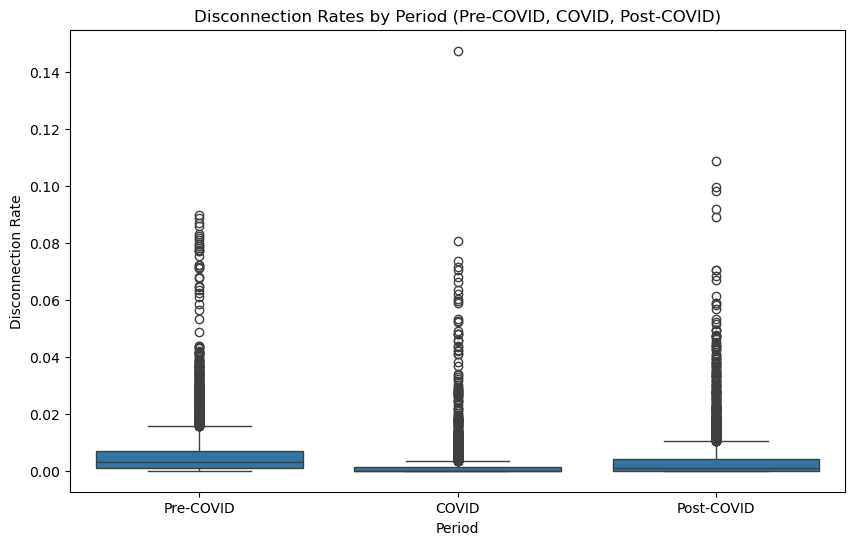

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize disconnection rates across periods
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Disconnection Rate', data=df)
plt.title('Disconnection Rates by Period (Pre-COVID, COVID, Post-COVID)')
plt.show()
